[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


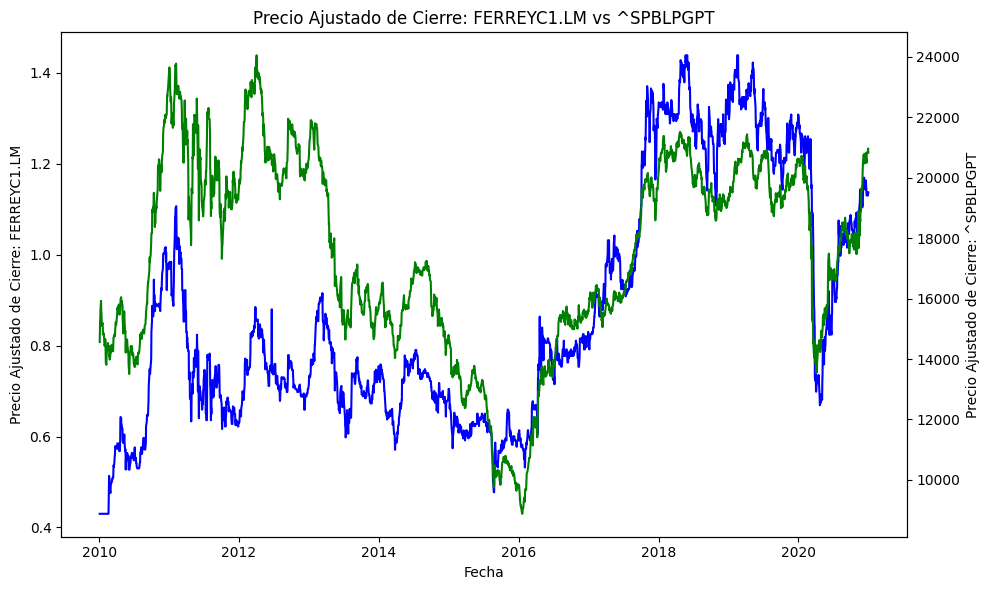

In [ ]:
# Carga de paquetes
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Definir fechas
start = pd.to_datetime('2010-01-01')
end = pd.to_datetime('2021-01-01')

# Descargar datos usando yfinance
stock_1 = 'FERREYC1.LM' # Accion de Ferreyros
index_1 = '^SPBLPGPT'# Indice de la BVL

# Descargar datos directamente usando yfinance
data_1 = yf.download(stock_1, start=start, end=end)['Adj Close']
data_2 = yf.download(index_1, start=start, end=end)['Adj Close']

# Graficar los datos
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(data_1, color='blue', label=stock_1)
ax1.set_xlabel('Fecha')
ax1.set_ylabel(f'Precio Ajustado de Cierre: {stock_1}', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()
ax2.plot(data_2, color='green', label=index_1)
ax2.set_ylabel(f'Precio Ajustado de Cierre: {index_1}', color='black')
ax2.tick_params(axis='y', labelcolor='black')
plt.title(f'Precio Ajustado de Cierre: {stock_1} vs {index_1}')
fig.tight_layout()
plt.show()

In [ ]:
# Resamplear a fin de mes
M_data_1 = data_1.resample('M').last()
M_data_2 = data_2.resample('M').last()

data = pd.DataFrame({'Inv_Close': M_data_1, 'Markt_Close': M_data_2})
data.head()


,Inv_Close,Markt_Close
Date,,
2010-01-31,0.430103,14440.049805
2010-02-28,0.485651,14002.320312
2010-03-31,0.574853,15129.000000
2010-04-30,0.620596,15842.259766
2010-05-31,0.563809,14504.139648


In [ ]:
import numpy as np

# Calcular los retornos logarítmicos de la acción e índice
data[['Inv_Ret', 'Markt_Ret']] = np.log(data[['Inv_Close', 'Markt_Close']] / data[['Inv_Close', 'Markt_Close']].shift(1))

# Eliminar los valores nulos generados por el shift
data.dropna(inplace=True)

# Mostrar las primeras filas del DataFrame con los retornos calculados
data.head()

,Inv_Close,Markt_Close,Inv_Ret,Markt_Ret
Date,,,,
2010-02-28,0.485651,14002.320312,0.121465,-0.030783
2010-03-31,0.574853,15129.000000,0.168623,0.077390
2010-04-30,0.620596,15842.259766,0.076566,0.046068
2010-05-31,0.563809,14504.139648,-0.095964,-0.088247
2010-06-30,0.551641,13985.009766,-0.021819,-0.036448


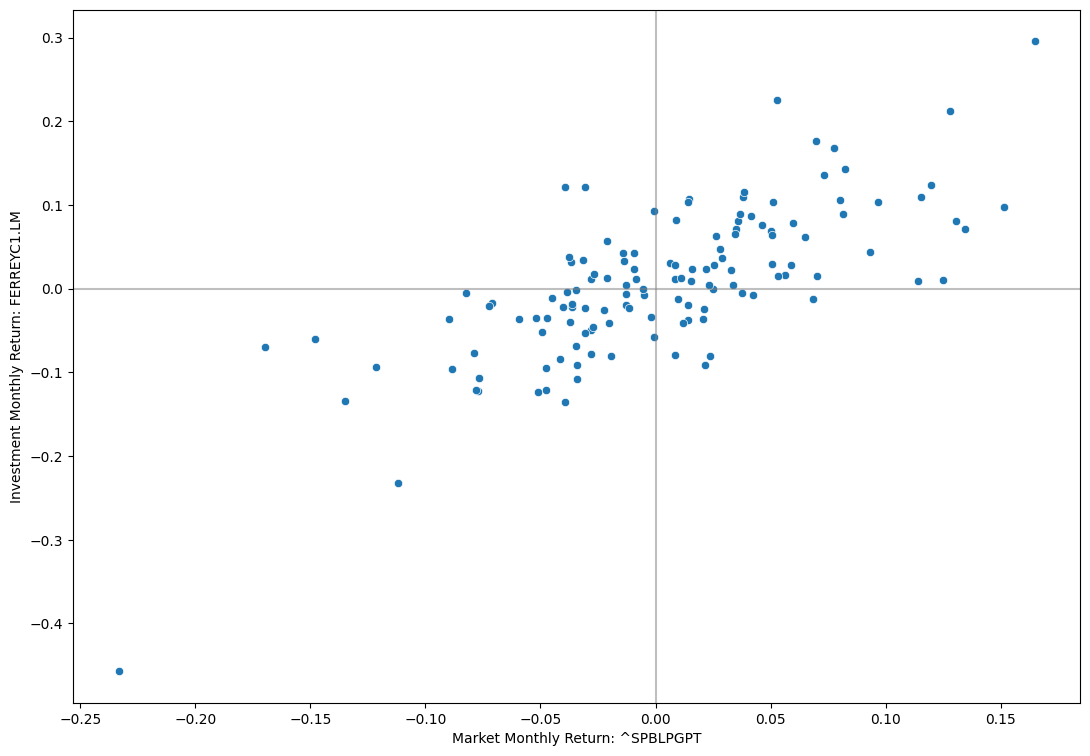

In [ ]:
# Crear la figura
plt.figure(figsize=(13, 9))

# Líneas en los ejes x y y
plt.axvline(0, color='grey', alpha=0.5)
plt.axhline(0, color='grey', alpha=0.5)

# Gráfico de dispersión con los retornos
sns.scatterplot(x='Markt_Ret', y='Inv_Ret', data=data)

# Etiquetas de los ejes
plt.xlabel(f'Market Monthly Return: {index_1}')
plt.ylabel(f'Investment Monthly Return: {stock_1}')

# Mostrar la gráfica
plt.show()

In [ ]:
# Calcular la beta usando la fórmula del CAPM
beta_form = (data[['Inv_Ret', 'Markt_Ret']].cov().iloc[0, 1]) / data['Markt_Ret'].var()

# Mostrar el resultado de la beta
print('Beta from CAPM formula: ', beta_form.round(4))


Beta from CAPM formula:  1.0381


In [ ]:
# Calcular la beta y el alpha usando regresión lineal
beta_reg, alpha = np.polyfit(data['Markt_Ret'], data['Inv_Ret'], deg=1)

# Mostrar los resultados
print('Beta from Linear Regression: ', beta_reg.round(4))
print('Alpha: ', alpha.round(3))

Beta from Linear Regression:  1.0381
Alpha:  0.005


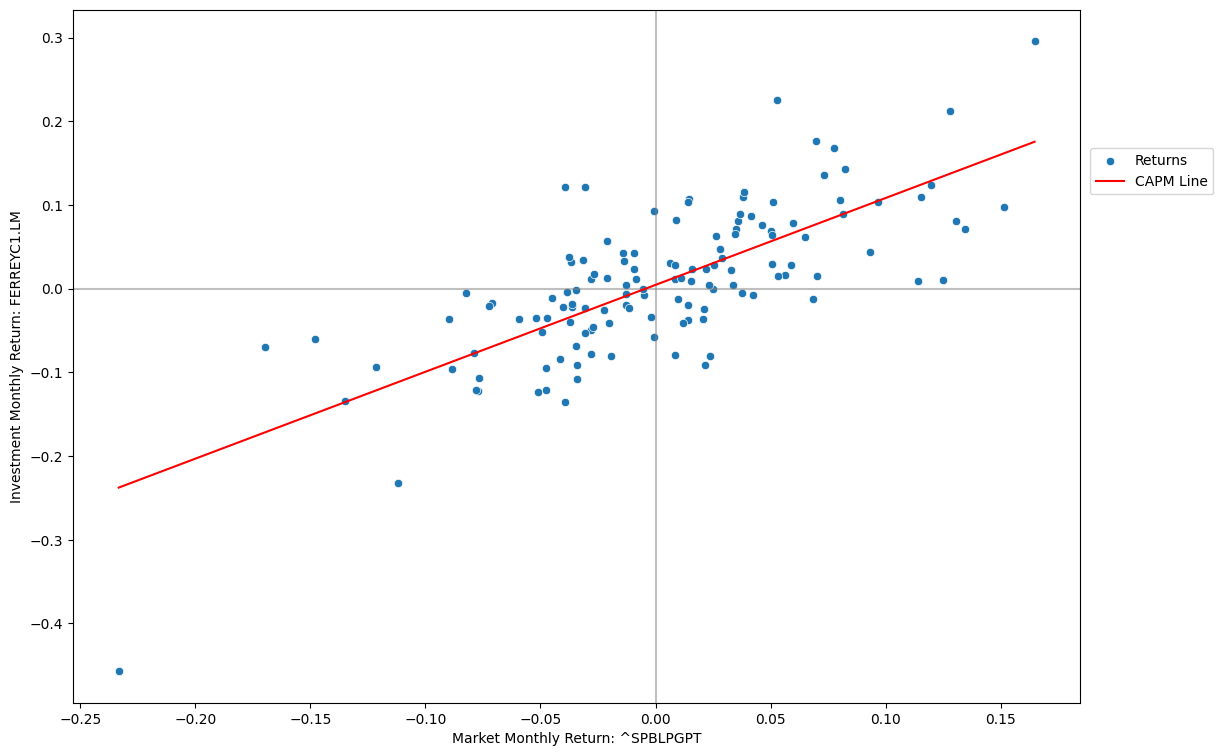

In [ ]:
# Crear la figura
plt.figure(figsize=(13, 9))

# Líneas en los ejes x y y
plt.axvline(0, color='grey', alpha=0.5)
plt.axhline(0, color='grey', alpha=0.5)

# Gráfico de dispersión con los retornos
sns.scatterplot(x='Markt_Ret', y='Inv_Ret', data=data, label='Returns')

# Línea de regresión CAPM
sns.lineplot(x=data['Markt_Ret'], y=alpha + data['Markt_Ret'] * beta_reg, color='red', label='CAPM Line')

# Etiquetas de los ejes
plt.xlabel(f'Market Monthly Return: {index_1}')
plt.ylabel(f'Investment Monthly Return: {stock_1}')

# Añadir la leyenda
plt.legend(bbox_to_anchor=(1.01, 0.8), loc=2, borderaxespad=0.)

# Mostrar la gráfica
plt.show()


In [ ]:
# 1. Calculando la covarianza
covarianza = np.cov(data['Inv_Ret'], data['Markt_Ret'])[0, 1]
print(f"Covarianza: {covarianza}")

# 2. Calculando la varianza
varianza = np.var(data['Markt_Ret'], ddof=1)  # ddof=1 para obtener la varianza muestral
print(f"Varianza: {varianza}")

# 3. Calculando la beta
beta = covarianza / varianza
print(f"Beta: {beta}")

# Parámetros para el modelo CAPM
rf = 0.02  # Tasa libre de riesgo (ejemplo)
rentabilidad_media_anual_indice = data['Markt_Ret'].mean() * 12  # Convertimos la media mensual a anual
print('Retorno medio del mercado:', rentabilidad_media_anual_indice.round(6))

# 4. Calculando la rentabilidad esperada con el modelo CAPM
rentabilidad_esperada = rf + beta * (rentabilidad_media_anual_indice - rf)

print('Rentabilidad esperada (CAPM):', rentabilidad_esperada.round(6))



Covarianza: 0.004270572879603606
Varianza: 0.004113944756483978
Beta: 1.0380724906120256
Retorno medio del mercado: 0.03352779482462309
Rentabilidad esperada (CAPM): 0.03404283166608496
